In [2]:
# Generate data
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.3, random_state=42)

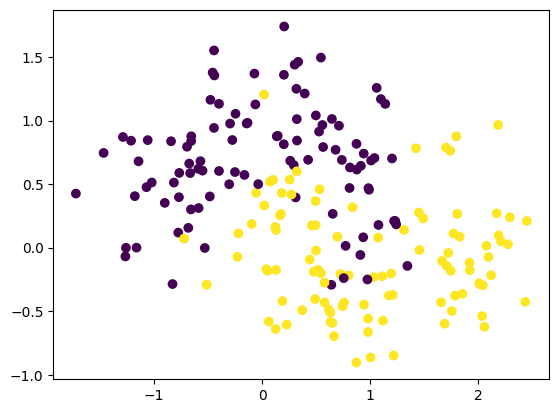

In [7]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x[:, 0], [x[:, 1]], c=y)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.85

In [17]:
x_test

array([[ 2.45329682e+00,  2.10143241e-01],
       [ 2.07920263e+00,  1.51468387e-02],
       [ 1.22309504e+00,  2.09854204e-01],
       [ 7.73567881e-01,  1.42694327e-02],
       [-5.31473412e-01, -2.39858004e-03],
       [ 5.00327700e-02, -1.81227646e-01],
       [ 6.97773867e-01,  8.57733006e-02],
       [ 2.01958613e-01,  1.36025786e+00],
       [ 2.03931049e+00, -5.38218098e-01],
       [ 1.70425238e+00,  7.88008928e-01],
       [ 1.35484808e-01,  8.76457496e-01],
       [ 6.65755246e-01, -6.96186132e-01],
       [-2.76319879e-01,  8.47120037e-01],
       [ 1.75526707e-02,  1.20439908e+00],
       [-1.26219224e+00, -9.88776098e-04],
       [ 3.94931294e-01,  1.21294124e+00],
       [ 5.78720083e-01, -4.30842628e-01],
       [-1.46933305e+00,  7.45335083e-01],
       [-4.58374895e-01,  1.37800069e+00],
       [-6.75878467e-01,  6.61654613e-01],
       [ 1.06159835e+00,  1.25752051e+00],
       [ 2.04359289e-01,  1.74055126e+00],
       [-6.59974747e-01,  3.00974427e-01],
       [-3.

In [19]:
model.predict([[ 2.71710525e-01, 4.18384274e-01]])

array([0])

In [20]:
model.predict_proba([[ 2.71710525e-01, 4.18384274e-01]])

array([[0.65270553, 0.34729447]])

In [26]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, x, y, cv=5)
cvs.mean()

np.float64(0.8350000000000002)

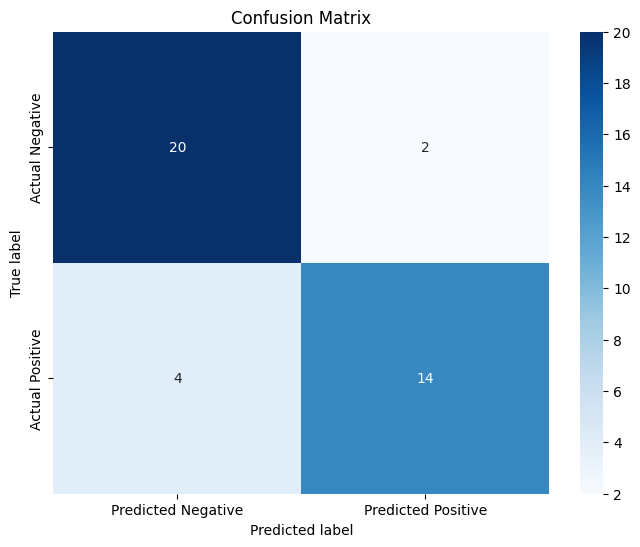

In [34]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [35]:
cm

array([[20,  2],
       [ 4, 14]])

In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv"
df = pd.read_csv(url, header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']] # removing useless variables such as cabin/ticker/name/...
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True
...,...,...,...,...,...,...,...
886,0,27.0,False,True,False,True,False
887,1,19.0,True,False,True,False,False
888,0,NaN,True,False,False,False,True
889,1,26.0,False,True,True,False,False


In [51]:
df.dropna(inplace=True)
df

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True
...,...,...,...,...,...,...,...
885,0,39.0,True,False,False,False,True
886,0,27.0,False,True,False,True,False
887,1,19.0,True,False,True,False,False
889,1,26.0,False,True,True,False,False


In [53]:
from sklearn.model_selection import train_test_split
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
 stratify=y, random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5).mean()

np.float64(0.7857480547621394)

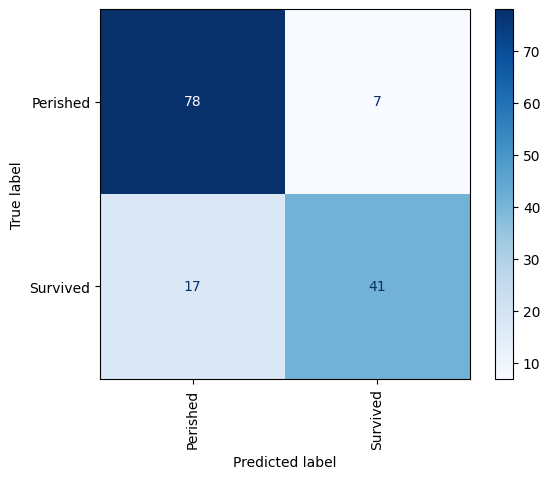

In [56]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test,
 display_labels=['Perished', 'Survived'],
 cmap='Blues', xticks_rotation='vertical')


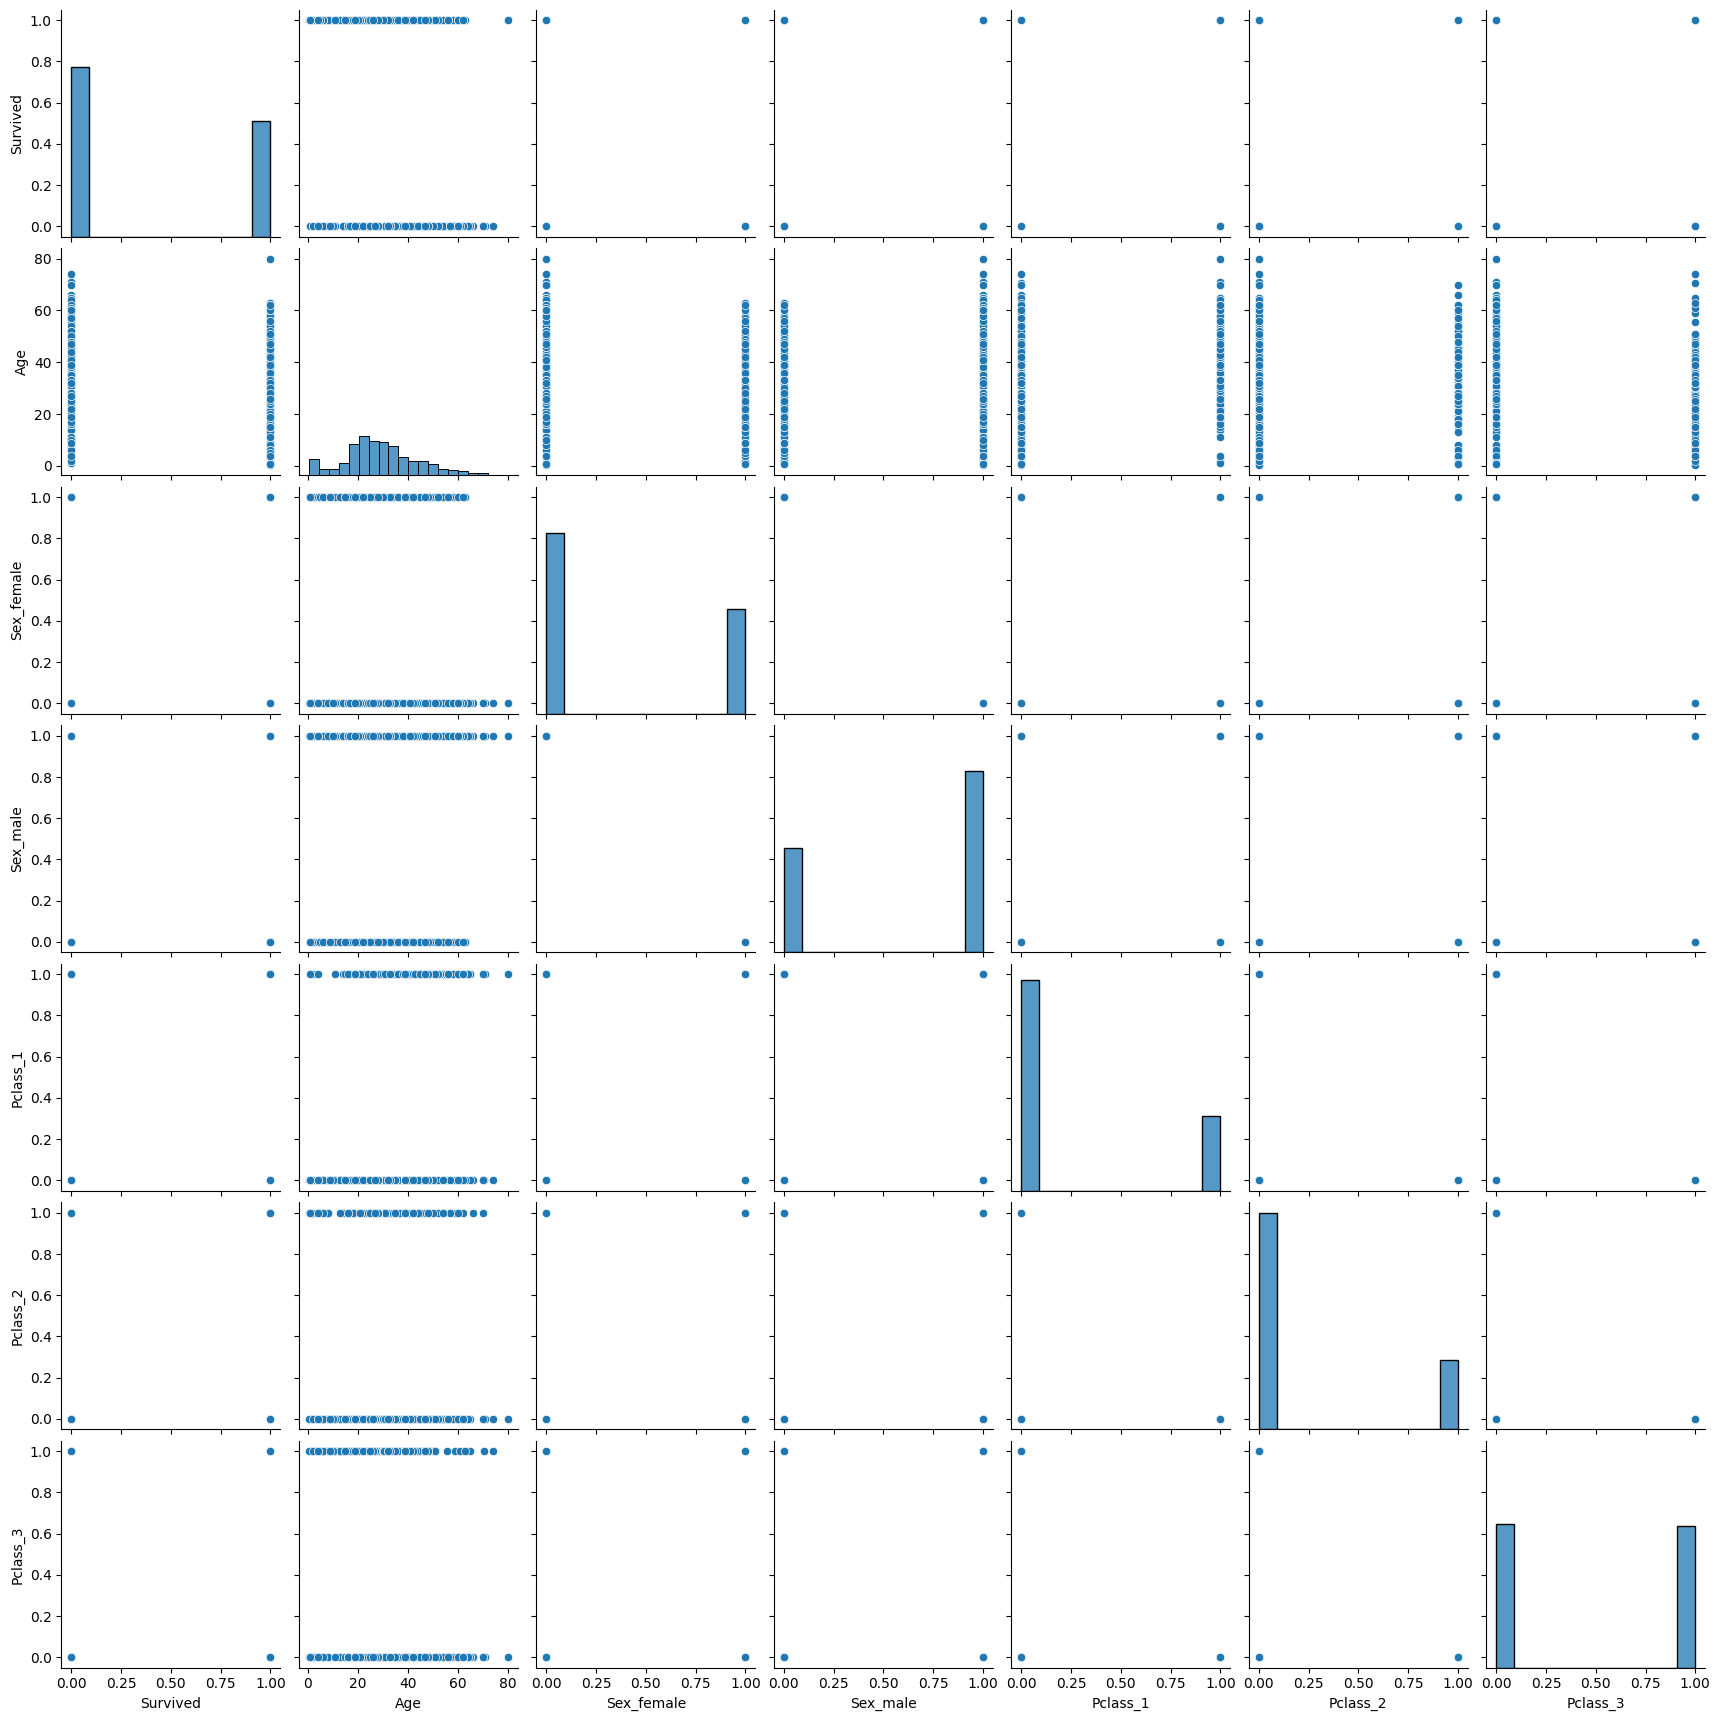

In [57]:
import seaborn as sns
sns.pairplot(df)

In [59]:
from sklearn.metrics import precision_score, recall_score
y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


In [60]:
female = pd.DataFrame({ 'Age': [30], 'Sex_female': [1], 'Sex_male': [0], 'Pclass_1': [1], 'Pclass_2': [0], 'Pclass_3': [0] })
model.predict(female)[0]

np.int64(1)

In [61]:
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')


Probability of survival: 91.6%


In [64]:

old_female = pd.DataFrame({ 'Age': [60], 'Sex_female': [1], 'Sex_male': [0], 'Pclass_1': [0], 'Pclass_2': [0], 'Pclass_3': [1] })
probability = model.predict_proba(old_female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 23.2%


In [67]:
boy = pd.DataFrame({ 'Age': [12], 'Sex_female': [0], 'Sex_male': [1],
 'Pclass_1': [0], 'Pclass_2': [1], 'Pclass_3': [0] })
probability = model.predict_proba(boy)[0]
print(probability)

[0.59877195 0.40122805]


### Credit Card Fraud Detection

In [69]:
path = 'C:\\Users\\cyril\\University\\exercices\\datasets\\credit-cards\\creditcard.csv'
df = pd.read_csv(path, header=0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [72]:
# Pruning the data
from sklearn.model_selection import train_test_split
x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [73]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

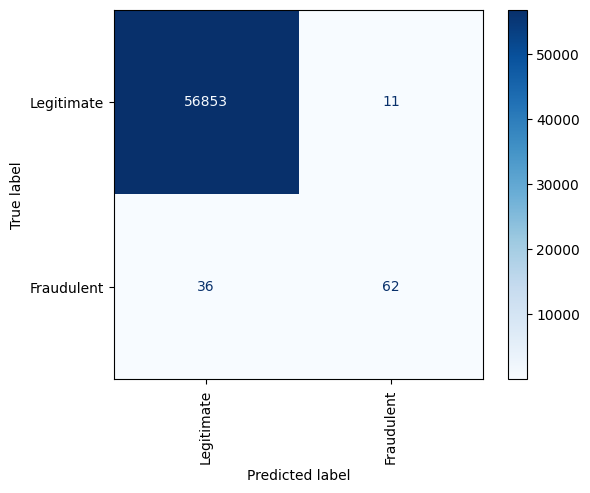

In [78]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
labels = ['Legitimate', 'Fraudulent']
cmd.from_estimator(lr_model, x_test, y_test, display_labels=labels,
 cmap='Blues', xticks_rotation='vertical')


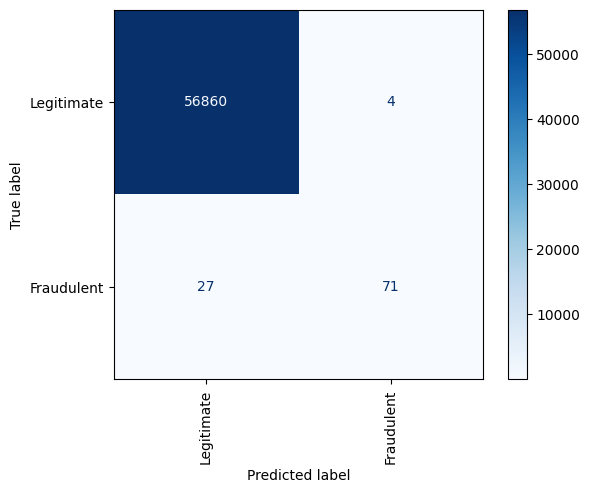

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)
cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

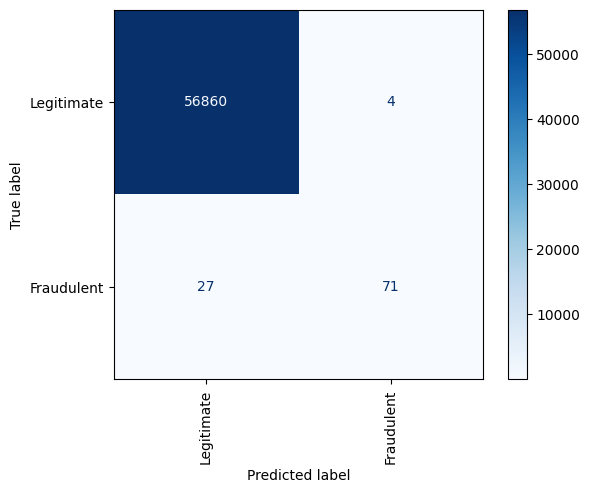

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_model.fit(x_train, y_train)
cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [82]:
path = 'C:\\Users\\cyril\\University\\exercices\\datasets\\IMBD\\dataset.csv'
df = pd.read_csv(path, header=0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [84]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [86]:
df = df.drop_duplicates()
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   24698  24698  No one expects the Star Trek movies to be high...   
positive   24884  24884  I thought this movie did a down right good job...   

                
          freq  
sentiment       
negative     1  
positive     1

In [88]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['review'])
y = df['sentiment']


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

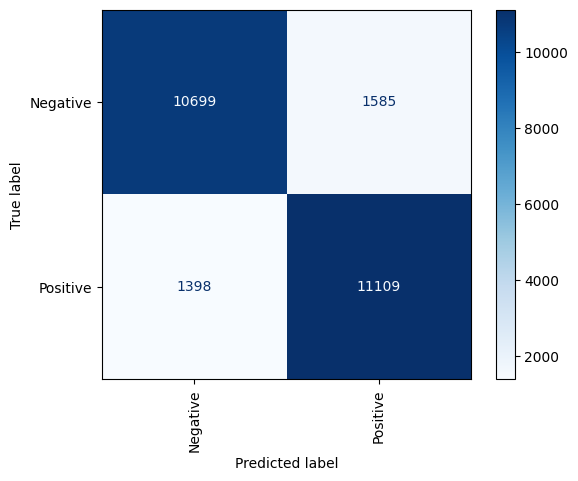

In [92]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')


In [103]:
text = 'not that i didnt like but didnt really love anyways, pretty bad movie'
model.predict_proba(vectorizer.transform([text]))

array([[0.75598887, 0.24401113]])

In [108]:
from sklearn.metrics.pairwise import cosine_similarity

# Your data
data = [[1, 2], [2, 3]]

cosine_similarity(data) # => [0][1] to get element of vector 1 compared to vector 2 otherwise calculated twice

array([[1.        , 0.99227788],
       [0.99227788, 1.        ]])

In [111]:
url = "https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%204/Data/movies.csv"
df = pd.read_csv(url, header=0)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [112]:
# Witheld important data and let the rest
df = df[['title', 'genres', 'keywords', 'cast', 'director']]
df = df.fillna('') # Fill missing values with empty strings
df.head()

,title,genres,keywords,cast,director
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [113]:
# add a column named features that combines all the words in the other columns
df['features'] = df['title'] + ' ' + df['genres'] + ' ' + df['keywords'] + ' ' + df['cast'] + ' ' +  df['director']

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=20)
word_matrix = vectorizer.fit_transform(df['features'])
word_matrix.shape

(4803, 918)

In [115]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_matrix)

: 